![ADSA Logo](http://i.imgur.com/BV0CdHZ.png?2 "ADSA Logo")

# ADSA Workshop 4 - Introduction to Pandas and Matplotlib
Workshop content adapted from:
* [Data Science from Scratch - First Principles with Python](http://www.amazon.com/Data-Science-Scratch-Principles-Python/dp/149190142X)
* [Greg Reda's Intro to pandas data structures](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/)

This workshop will dive into data processing and visualization with Numpy, Pandas, and Matplotlib.

***

# Pandas

As stated on the official [pandas site](http://pandas.pydata.org/) "pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language." Pandas is built on top of NumPy, and provides two key data structures for processing data: Series and DataFrames.

To begin, we first need to import pandas and numpy:

In [26]:
import pandas as pd
import numpy as np

'''
For easiest visual display later on.
'''
pd.set_option('max_columns', 50)

'''
This line is Jupyter Notebook specific and allows for graphs
to be displayed in the notebook.
''' 
%matplotlib inline

## Series

A Series is a one-dimensional object containing a series of items, and is similar to an array or list in Python. A Numpy series assigns a labeled index to every entry in the series, and uses the numbers 0 through n (length of the series - 1) by default.

### Creating a Series

To make a series, we can pass in a Python list to the pd.Series() function. Note the convenient printing format and indices given when we print the series.

In [2]:
s = pd.Series(['ADSA', 5, True, -3.14 ])
print s

0    ADSA
1       5
2    True
3   -3.14
dtype: object


If you want, you can specify index labels to be used rather than the default 0 to n, by passing in an index list. (Note that the index list must be the same length as the series).

In [3]:
s = pd.Series(['ADSA', 5, True, -3.14 ], index=['A', 'B', 'C', 'D'])
print s

A    ADSA
B       5
C    True
D   -3.14
dtype: object


We can also take an existing Python dictionary and convert it to a series by passing it into the pd.Series() function.

In [4]:
# Let's assume we have a dictionary of cities and weather data
d = {'Chicago': 75,
     'Boston': 65,
     'New York': 70,
     'San Francisco': 80,
     'Los Angeles': 82,
     'Austin': None
}

weather = pd.Series(d)
print weather

Austin          NaN
Boston           65
Chicago          75
Los Angeles      82
New York         70
San Francisco    80
dtype: float64


### Querying a Series

We can then access data for specific indices by passing either a single index, or a list of indices in brackets.

In [ ]:
print weather['Chicago']

print '\n'

print weather[['Chicago', 'Austin']]

We can use boolean statements involving our series in order to check if something is in a series or generate a series of true and false values for those entries which satisfy the statement.

In [ ]:
print 'Chicago' in weather

print '\n'

weather_less_than_80 = weather < 80
print weather_less_than_80

By passing in these boolean statements, we can query the series for entries which satisfy the boolean.

In [ ]:
print weather[weather < 80]

print '\n'

print weather[weather <= 70]

print '\n'

print weather[weather < 65]

print '\n'

### Combining Series

We can also perform scalar multiplication and division, and numpy operations on series.

In [ ]:
print weather / 3

print '\n'

print weather * 2

print '\n'

print np.square(weather)

We can also add two series together. If the same index exists in both series, then their values will be added, otherwise a Null/NaN (Not a Number) value will be assigned to the resulting series.

In [ ]:
# Note that the two dictionaries share the key 'New York' but not Chicago or Boston
d1 = {'Chicago': 65, 
      'New York': 55
     }

d2 = {'New York': 10,
      'Boston': 60
     }

s1 = pd.Series(d1)
s2 = pd.Series(d2)

# The value for New York will be added, but the values for Chicago and Boston are indeterminate and marked as NaN
s3 = s1 + s2
print s3

Finally, to tell if values in a series or Null (NaN) or not, we can use the functions .isnull() and .notnull() respectively. Note that we can use the same boolean logic as before to either display True and False values for every index, or query for indices which are Null.

In [ ]:
print s3.isnull()

print '\n'

print s3[s3.isnull()]

## DataFrames

A DataFrame is a table-based Pandas data structure made up of rows and columns, just like a spreadsheet. Another way to think of DataFrames are as a group of Series in which each index is a column in the table.

### Creating a DataFrame from a Dictionary

In order to create a DataFrame from Python structures, we can create a dictionary of lists, in which each dictionary key is a column of the table, and each entry in the key's list is the value for that column in each row. 

We then call the pd.DataFrame(data, columns) function where data = the Python dictionary to be passed in, and columns = the ordering in which the columns appear in the table (If no order is specified, column names will be listed alphabetically).



In [ ]:
d = {'student': ['Aaron', 'Josh', 'Tom', 'Justin', 'Andrew'],
     'credits': ['15', '14', '17', '18', '14'],
     'gpa': [3.52, 3.67, 3.43, 3.85, 3.32]
}

students = pd.DataFrame(d, columns=['student', 'credits', 'gpa'])
students

### Creating a DataFrame from a CSV

Often times, the dataset we have will be in CSV (Comma Separated Value) form. CSV files exist as a series of values separated by commas. For this tutorial, we have pulled a sample CSV file from the [Kaggle Titanic Project](https://www.kaggle.com/c/titanic/data?train.csv) containing data on the passengers of the Titanic.

To see what the Titanic data looks like as a CSV, click [here](https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv). 

We can easily take data from a CSV file and import it into a DataFrame by using the pd.read_csv() function. By passing in header=0, we tell Pandas that the header information is contained on row 0.

We can then read the first 5 entries by using the .head() function.

In [5]:
df = pd.read_csv('train.csv', header=0)

# Note that the csv data is now a Pandas DataFrame
print type(df)

# Returns first 5 entries
df.head()

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


To view the last n entries, we can use the .tail(n) function.

In [6]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


### Analyzing the Data

By calling the .info() function, we can see information regarding the column names, total number of entries, and types for each column.

In [ ]:
df.info()

From this data, we can see that we have 891 entries (rows) in our DataFrame. We can also infer that since Age, Cabin, and Embarked do not have 891 entries, there are some rows for which that information is Null.

### Summarizing the Data

The .describe() function can be incredibly useful when analzing a data set. By calling this function, Pandas will tell us the count, mean, standard deviation, interquartile range, maximum, and minumum values for each column in our data set which has a numerical type.

We must however, remember that there are Null values in the Age, Cabin, and Embarked columns, meaning you should take that into considering when discussing their described values.

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Munging (Cleaning)

Pandas provides many tools to manipulate, filter, combine, and transform your data. We will now cover the syntax and some of the things you can do.

### Filtering Data

To grab the first 10 rows from the age column, we can enter the key and indices in square brackets [ ]. Alternatively, you can acess a column by typing its name right after the DataFrame name like df.Survived[0:10].

In [8]:
# Without indices, we can grab the entire column
# df.Age or df['Age']

# Or we can pass in indices to clean up the data
print df['Age'][0:10]
print ''
# This is equivalent
print df.Age[0:10]

0    22
1    38
2    26
3    35
4    35
5   NaN
6    54
7     2
8    27
9    14
Name: Age, dtype: float64

0    22
1    38
2    26
3    35
4    35
5   NaN
6    54
7     2
8    27
9    14
Name: Age, dtype: float64


If we look at the type of each column, we can see that DataFrames are actually made up of Pandas Series.

In [ ]:
type(df.Age)

By grabbing an individual column as a series, we can calculate the mean, median, or a number of statistical values by using methods of the same name.

In [ ]:
print 'MEAN: ' + str(df.Age.mean())
print 'MEDIAN: ' + str(df.Age.median())
print 'MAX: ' + str(df.Age.max())
print 'MIN: ' + str(df.Age.min())
print 'SUM: ' + str(df.Age.sum())

We can also grab a number of columns at once by passing in a list of columns.

In [ ]:
df[['Sex', 'Pclass', 'Age']]

### Querying DataFrames

Just as we discussed above in the Series section, we can pass in boolean arguments to query for data which satisfies a description.

For instance, let's say we want to look at every passenger of the Titanic who was over the age of 70, we could do this:

In [ ]:
df[df.Age > 70]

DataFrames allow us to run multiple queries on our data sets as well by either using parenthesis and an & sign, or by passing in two expressions in square brackets.

For example, we can pull all female passengers over the age of 60 by running this:

In [ ]:
df[(df.Sex == 'female') & (df.Age > 60)]
# or equivalently
# df[df.Sex == 'female'][df.Age > 60]

And we can further specify which additional column names we which to view by again passing a list of column names.

In [ ]:
df[(df.Sex == 'female') & (df.Age > 60)] [['Age','Sex','Ticket','Fare']]

If we were curious in investigating all the Null values for Age we discovered earlier, we can easily grab them. 

In [ ]:
df[df.Age.isnull()][['Age','Sex','Pclass']]

By combining traditional Python functionality with Pandas, we can start to perform some interesting, useful queries. 

For instance, let's say we want to determine how many females there were in each Pclass on the Titanic. Since there are 3 classes in the data, Pclass = 1, 2, and 3, we can run a for loop on range(1,4), and grab the length (number of entries) for the females in each class. This could be performed very quickly using Pandas and Python, and demonstrates some of the power of the framework:

In [ ]:
for i in range(1,4):
    print 'Pclass: ' + str(i) + ' Females: ' + str(len(df[df.Sex == 'female'][df.Pclass == i]))

***

# Data Visualization

"A fundamental part of the data scientist’s toolkit is data visualization. Although it is
very easy to create visualizations, it’s much harder to produce good ones.
There are two primary uses for data visualization:
* To explore data
* To communicate data"

-Joel Grus, Data Science from Scratch

There are many tools that we can use to visualize data, however one of the most widely used tools is the [matplotlib](http://matplotlib.org/) library. While other libraries such as [d3.js](https://d3js.org/) are more commonly used for web visualizations, the matplotlib.pyplot module does an excellent job at quickly producing bar charts, line charts, and scatterplots in Python.

To begin, we will first import the pyplot module from matplotlib.

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

## Bar Charts

A bar chart can be a very helpful, simple visualization when you need to illustrate quantities of a discrete set of items. With matplotlib, we can take two lists, labels and heights, and easily create a bar chart.

We can use the plt.bar() method to create bargraphs. This function takes in a list of xcoordinates to start each bar, and a list of corresponding heights for each bar.

The following is an example of how we could create a simple bargraph to visualize the number of academy awards won by movies.

[0.1, 1.1, 2.1, 3.1, 4.1]


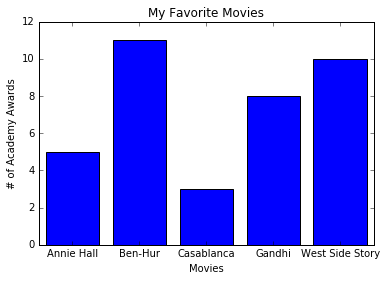

In [11]:
# These are movies we wish to plot, as well as the number of awards won
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

'''
Bars start from xcoordinate 0 by default, so to make the graph look nicer, we can add
0.1 to each bar xcoordinate to shift them a bit to the right.

One way to do this is to use a list comprehension along with a range from 0 to the length
of movies, and yield a list of each index + 0.1.
'''
xcoords = [i + 0.1 for i in range(0, len(movies))]
print xcoords

# plot bars with left x-coordinates [xcoords], heights [num_oscars]
plt.bar(xcoords, num_oscars)

# We can add titles and x/y labels by using the following plt methods
plt.xlabel('Movies')
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

# To add a label for each bar, we can use .xticks with a list of xcoordinates and strings
# We move over the xcoordinates by 0.5 this time just to properly center them
plt.xticks([i + 0.5 for i in range(0, len(movies))], movies)

# Finally, we can display the graph with plt.show()
plt.show()

Bargraphs are also great for creating histograms, graphs in which the y-axis illustrates frequency of the x-axis' values. 

Below is an example of how to create a histogram for exam distributions. In this example, we use a few other parameters in our plot. When we call plt.bar(), we pass in a bar width parameter, and we also call plt.axis() to change the range of x and y-coordinates shown.

[0, 100, 70, 80, 90, 60]
[2, 1, 3, 4, 2, 1]


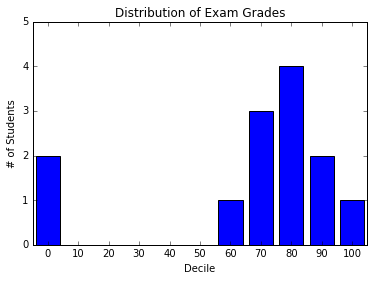

In [3]:
# Dictionary like structure which countains a count of the frequency of something
from collections import Counter

grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]

# The lambda keyword creates quick functions
# dec is a function which takes input grade and rounds it to the lowest nearest multiple of 10 
dec = lambda grade: (grade // 10) * 10

# This creates a dictionary of the frequency count of grades in each percentage range by 10's
histogram = Counter(dec(grade) for grade in grades)
print histogram.keys() # Retrieves all the keys
print histogram.values() # Retrieves frequencies

# We now create our graph. Note that we are scooting over the xcoords by 4 to make it look nice
plt.bar([x - 4 for x in histogram.keys()],
       histogram.values(),
       8) # We are passing in a value for the optional bar width parameter

# Extends the x-axis to show values from -5-105, and y to show 0-5
plt.axis([-5, 105, 0, 5])

# Labels each x-axis bar by 10's
plt.xticks([10 * i for i in range(11)])

# The rest of our labels
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam Grades")
plt.show()

### Line Charts

Line charts can be very useful in illustrating trends, and be very useful for visualizing data. We can use the plt.plot() method in order to create line charts with Matplotlib. 

Below is an example of a fake stock market chart comparing two companies:

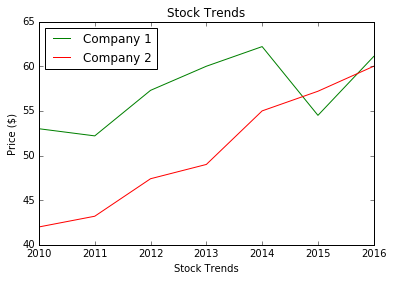

In [9]:
# Fake company stock data
company1 = [53.0, 52.2, 57.3, 60.0, 62.2, 54.5, 61.1]
company2 = [42.0, 43.2, 47.4, 49.0, 55.0, 57.2, 60.0]
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]

# The xcoords are the same for both, so we can just grab them for company 1
xcoords = [i for i in range(0, len(company1))]

# plt.plot() takes in the xcoodinates, ycoordinates, and an optional color/label name
plt.plot(xcoords, company1, 'g-', label='Company 1')
plt.plot(xcoords, company2, 'r-', label='Company 2')

plt.legend(loc=2) # This enables and determines the location of the graph's legend
plt.xlabel("Stock Trends")
plt.ylabel('Price ($)')
plt.title("Stock Trends")

plt.xticks([i for i in range(0, len(years))], years) # Adds the years as labels

plt.show()

### Scatter Plots

Finally, scatter plots can be useful for illustrating the relationship between two variables. We can use the plt.scatter() function to create scatter plots in matplotlib.

Below is an example of a scatter plot showing the relatinoship between number of online friends vs the number of minutes spent on a social media website.

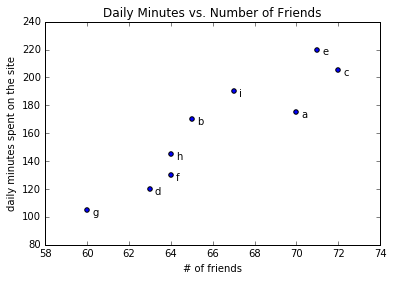

In [17]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'] # A list of arbitrary labels for the scatter points

# Creates scatter plot
plt.scatter(friends, minutes)

# label each point. Zipping creates a list of tuples that looks like [('a', 70, 175), ('b', 65, 170)...] etc.
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
    xy=(friend_count, minute_count), # put the label with its point
    xytext=(5, -5), # offsets the label by +5x and -5y
    textcoords='offset points') # tells matplotlib that the xytext should be offset by that amount
    
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

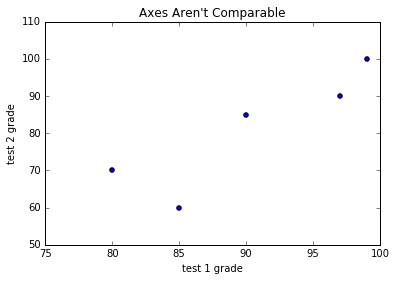

In [32]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()